In [1]:
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
execfile('../../matplotlibrc.py')

# Question 1

In [3]:
# Constants
ae = k = 40.0
f = 4.0*10**6
b = 400.0
uinf = 20.0
he = 0.025
R = 0.05

In [4]:
def Klocal(ra):
    return k/he*(ra + 0.5*he)*np.array([[1, -1], [-1, 1]])

def Flocal(ra):
    return f*he/6*np.array([3*ra + he, 3*ra + 2*he])

In [5]:
# Element 1
k1 = Klocal(0.0)
f1 = Flocal(0.0)
print(k1)
print(f1)

[[ 20. -20.]
 [-20.  20.]]
[ 416.66666667  833.33333333]


In [6]:
# Element 2
k2 = Klocal(he)
f2 = Flocal(he)
print(k2)
print(f2)

[[ 60. -60.]
 [-60.  60.]]
[ 1666.66666667  2083.33333333]


In [7]:
K = np.zeros((3, 3))
F = np.zeros(3)
sctr = [0,1]
K[np.ix_(sctr, sctr)] += k1
F[sctr] += f1
sctr = [1,2]
K[np.ix_(sctr, sctr)] += k2
F[sctr] += f2
print(K)
print(F)

[[ 20. -20.   0.]
 [-20.  80. -60.]
 [  0. -60.  60.]]
[  416.66666667  2500.          2083.33333333]


In [8]:
K[2,2] += R*b
F[2] += R*b*uinf

In [9]:
U = solve(K, F)

In [10]:
x = np.arange(0, 0.075, he)
xex = np.linspace(0, R)
Uex = uinf + f*R/(2*b) + f*R**2/(4*k)*(1 - xex**2/R**2)

In [11]:
U

array([ 339.44444444,  318.61111111,  270.        ])

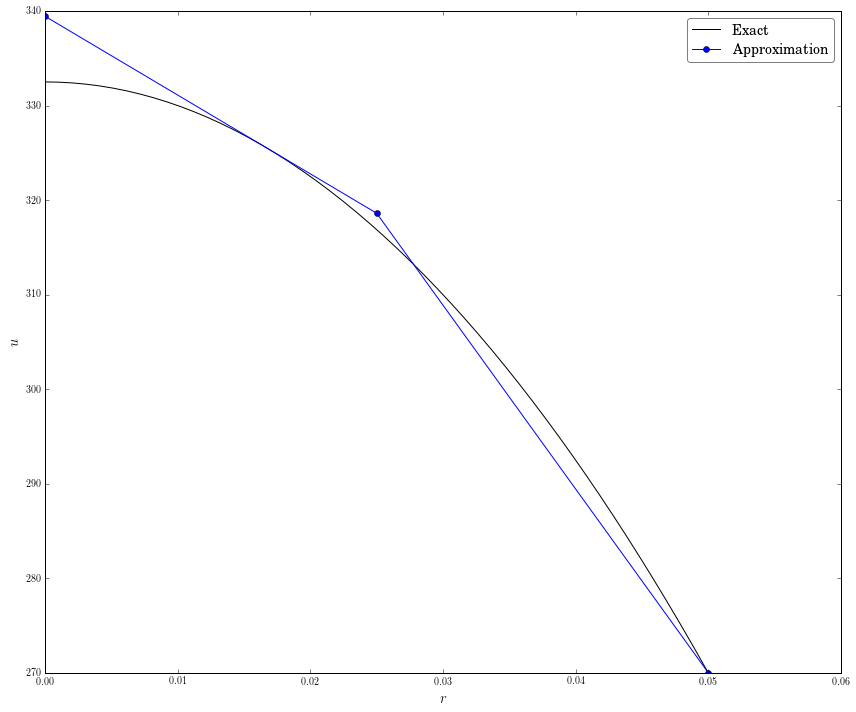

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.plot(xex, Uex, 'k', label='Exact')
ax.plot(x, U, 'b-o', label='Approximation')
ax.set_xlabel('$r$')
ax.set_ylabel('$u$')
ax.legend(numpoints=1)
fig.tight_layout()
plt.show()
fig.savefig('tex/figs/q1.pdf', dpi=400)

# Problem 2

In [17]:
L = 2.0

In [18]:
K = 2.0/L**3*np.array([[6, 3*L], [3*L, 2*L**2]])
K

array([[ 1.5,  1.5],
       [ 1.5,  2. ]])

In [19]:
Q = L/12*np.array([6, L]) + 1.0/60.0*np.array([-21*L, -3*L**3])

In [21]:
solve(K, Q)/2

array([-0.53333333,  0.3       ])